### Esercitazione 1.1

L'obiettivo di questo esercizio è testare la qualità del generatore di numeri pseudo-casuali fornito, verificando che la distribuzione generata sia compatibile con una distribuzione uniforme nell'intervallo [0,1].
Per fare ciò è stato calcolato il valore atteso della media e della varianza come:

$\langle r \rangle = \int_0^1 r dr = 1/2$

$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

Per poter effettuare una qualsiasi simulazione ed evitare che l'autocorrelazione fra una misura precedente ed una successiva possa interferire nel risultato finale, si utilizza il metodo del data blockin,.
Partendo da un dataset di M dati,lo si suddivide in N blocchi, in ognuno di esso si avrà $L$=$\frac{M}{N}$ dati a disposizione; successivamente dopo aver calcolato le medie per i singoli blocchi, si possono mediare fra di loro per poter ottenere dei risultati sempre più precisi.
Inoltre la stima dell' errore del datablocking si ottiene:
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
In questa simulazione vegnono usati $M$=100000 e $N$=100.

Qui di seguito vengono riportati i risultati del datablocking per la simulazione di $\langle r \rangle$ e $\sigma^2$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2

#presa dati
dati = np.loadtxt("Es1.1/dati.csv",delimiter=",",skiprows=1)
medie=dati[:,0]
err=dati[:,1]
var=dati[:,2]
err2=dati[:,3]
chi3=dati[:,4]

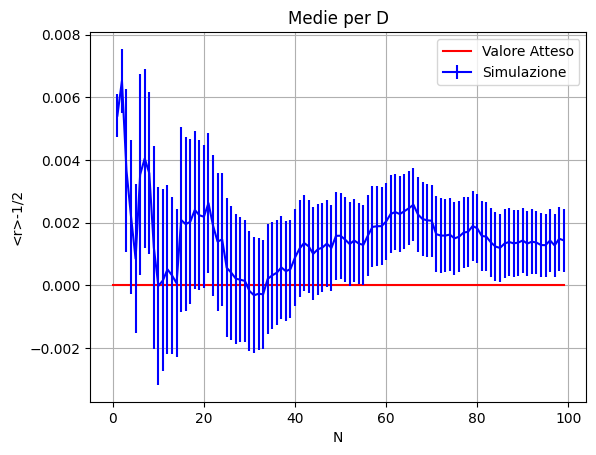

In [2]:
#media
plt.plot(range(0,100),[0]*100,color='r',label="Valore Atteso")
plt.errorbar(range(1,len(medie)+1),medie-0.5,color='b',yerr=err, label="Simulazione")
plt.xlabel("N")
plt.ylabel("<r>-1/2")
plt.grid()
plt.legend()
plt.title("Medie per D")
plt.show()
plt.close()

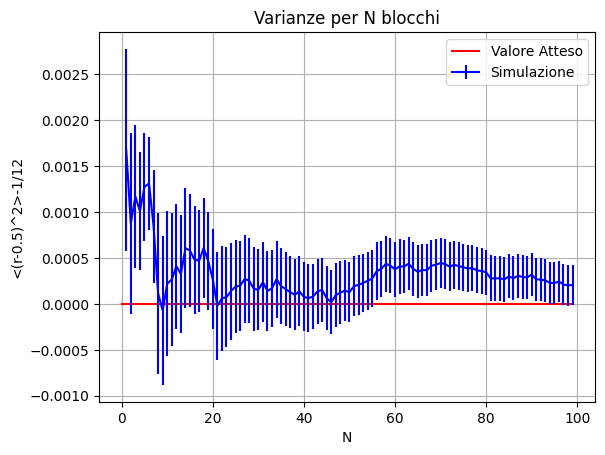

In [3]:
#varianza
plt.plot(range(0,100),[0]*100,color='r',label="Valore Atteso")
plt.errorbar(range(1,len(var)+1),var-1/12,color='b',yerr=err2,label="Simulazione")
plt.xlabel("N")
plt.ylabel("<(r-0.5)^2>-1/12")
plt.grid()
plt.legend()
plt.title("Varianze per N blocchi")
plt.show()
plt.close()

L’ipotesi di partenza è che i numeri $r$ siano estratti da una distribuzione uniforme.
In statistica, tuttavia, non è possibile dimostrare con certezza che una sequenza di eventi casuali provenga da una data distribuzione.
(In effetti, nel caso dei numeri pseudo-casuali, sappiamo che l’ipotesi è tecnicamente falsa: sono generati da algoritmi deterministici.)

Quello che possiamo fare è stimare la probabilità che i numeri osservati non provengano da una distribuzione uniforme.
Se questa probabilità risulta sufficientemente bassa, possiamo rigettare con un buon grado di confidenza l’ipotesi nulla (cioè l’ipotesi di uniformità).


L’ipotesi iniziale è che i numeri siano estratti da una distribuzione uniforme.  
Tuttavia, in statistica non è possibile dimostrare direttamente che una sequenza di eventi casuali provenga da una data distribuzione(nel caso dei numeri pseudo-casuali, questa ipotesi è in realtà falsa, poiché tali numeri sono generati da algoritmi deterministici.).

Quello che possiamo fare è stimare la probabilità che i valori di $ r $ non provengano da una distribuzione uniforme.  
Se tale probabilità è sufficientemente bassa, possiamo rigettare l’ipotesi nulla e concludere che i dati osservati non sono compatibili con una distribuzione uniforme.

Tale stima viene effettuata con il $\chi^2$ di Pearson:

Il test $\chi^2$ cumulativo di Pearson misura la discrepanza tra i valori osservati $O_i$ e i valori attesi $E_i$:

$\chi^2 = \sum_i \frac{(O_i - E_i)^2}{E_i}$

Possiamo utilizzare in questa formula $E_i$ come varianza dato che:

Se consideriamo $n$ prove indipendenti, ciascuna con probabilità di successo $ p$, la probabilità di osservare esattamente $ k$ successi segue la distribuzione binomiale:


$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$

- La media è: $\langle X \rangle = np$
- La varianza è: $\sigma^2 = np(1 - p)$

Nel caso in cui $ p \ll 1 $, possiamo approssimare:

$\sigma^2 \simeq np = \langle X \rangle$

Poiché $E_i = np$, otteniamo che:

$\sigma^2 \simeq E_i$

Questo giustifica l’uso del termine $E_i$ al denominatore nella formula della statistica $\chi^2$.




Abbiamo suddiviso l’intervallo $[0,1]$ in $M = 100$ sottointervalli identici.  
Per ogni gruppo di $n = 10^4$ numeri pseudo-casuali generati, abbiamo contato il numero di eventi $n_i$ che cadono in ciascun sottointervallo $i$.

Secondo l’ipotesi di uniformità, il numero atteso di eventi in ogni sottointervallo è:

$E_i = \frac{n}{M} = \frac{10^4}{100} = 100$

Abbiamo quindi calcolato la statistica $\chi^2$ per ciascun gruppo $j = 1, \ldots, 100$ di $10^4$ numeri consecutivi, usando la formula:

$$
\chi^2_j = \sum_{i=1}^M \frac{(n_i - E_i)^2}{E_i}
$$


Il grafico seguente mostra il valore finale del $\chi^2$:




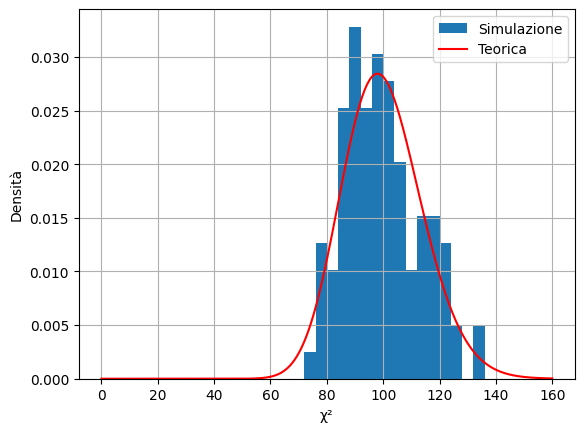

In [4]:
#chiquadro
x=np.linspace(0,160,400)
pdf_chi2=chi2.pdf(x,100)
plt.hist(chi3,range=(0,160),bins=40,label="Simulazione",density=True)
plt.plot(x,pdf_chi2,label="Teorica",color="red")
plt.xlabel("χ²")
plt.ylabel("Densità")
plt.grid()
plt.legend()
plt.show()

### Esercitazione 1.2

##### Verifica del Teorema del Limite Centrale per diverse distribuzioni:

Vogliamo verificare il Teorema del Limite Centrale considerando diverse distribuzioni di probabilità.  
Per generare i campioni, abbiamo utilizzato il metodo dell’inversione della funzione di distribuzione cumulativa (CDF), per farlo abbiamo considerato:

- **Distribuzione esponenziale** con parametro $\lambda$:  
  La funzione di distribuzione cumulativa invertita è:

  $$
  F^{-1}(x) = -\frac{1}{\lambda} \ln(1 - x)
  $$

- **Distribuzione di Cauchy-Lorentz** con media $\mu$ e larghezza a mezza altezza $\Gamma$:  
  La funzione di distribuzione cumulativa invertita è:

  $$
  F^{-1}(x) = \mu + \Gamma \tan\left[\pi \left(x - \frac{1}{2}\right)\right]
  $$

Dove $x$ è un numero casuale generato uniformemente nell’intervallo $[0,1)$.

Per ogni tipo di distribuzione, consideriamo $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ con $N=1, 2, 10, 100$, dove $x_i$ è una variabile casuale che segue la distribuzione uniforme,esponenziale e Lorentziana.

Nelle celle seguenti sono mostrati gli istogrammi ottenuti campionando $N$ volte le variabili casuali corrispondenti:  
- $X_U$ da una distribuzione uniforme,  
- $X_E$ da una distribuzione esponenziale con parametro $\lambda=1$,  
- $X_C$ da una distribuzione di Cauchy-Lorentz con parametri $\mu=0$ e $\Gamma=1$.



In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

# Caricamento dati
dati = np.loadtxt("Es1.2/dati2.csv", delimiter=",")
S1exp, S2exp, S10exp, S100exp = dati[:,0], dati[:,1], dati[:,2], dati[:,3]
S1unf, S2unf, S10unf, S100unf = dati[:,4], dati[:,5], dati[:,6], dati[:,7]
S1ltz, S2ltz, S10ltz, S100ltz = dati[:,8], dati[:,9], dati[:,10], dati[:,11]

def plot_distribuzione_2x2(dati_array, bins, range_, titolo_base, gauss_params=None, lorentzian=False):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 righe x 2 colonne
    Ns = [1, 2, 10, 100]

    for i, ax in enumerate(axs.flat):
        ax.hist(dati_array[i], bins=bins, density=True, range=range_, stacked=True)
        ax.grid(True)
        ax.set_xlabel("Numeri Casuali")
        ax.set_ylabel("Prob. di Generazione")
        ax.set_title(f"{titolo_base} N={Ns[i]}")

        if Ns[i] == 100:
            if gauss_params is not None:
                x_gauss, y_gauss = gauss_params
                ax.plot(x_gauss, y_gauss, color="red", label="Gaussiana teorica")
                ax.legend()
            elif lorentzian:
                x_lorentz = np.linspace(range_[0], range_[1], 6000)
                y_lorentz = cauchy.pdf(x_lorentz, 0, 1)
                ax.plot(x_lorentz, y_lorentz, color="red", label="Lorentziana teorica")
                ax.legend()

    plt.tight_layout()
    return fig


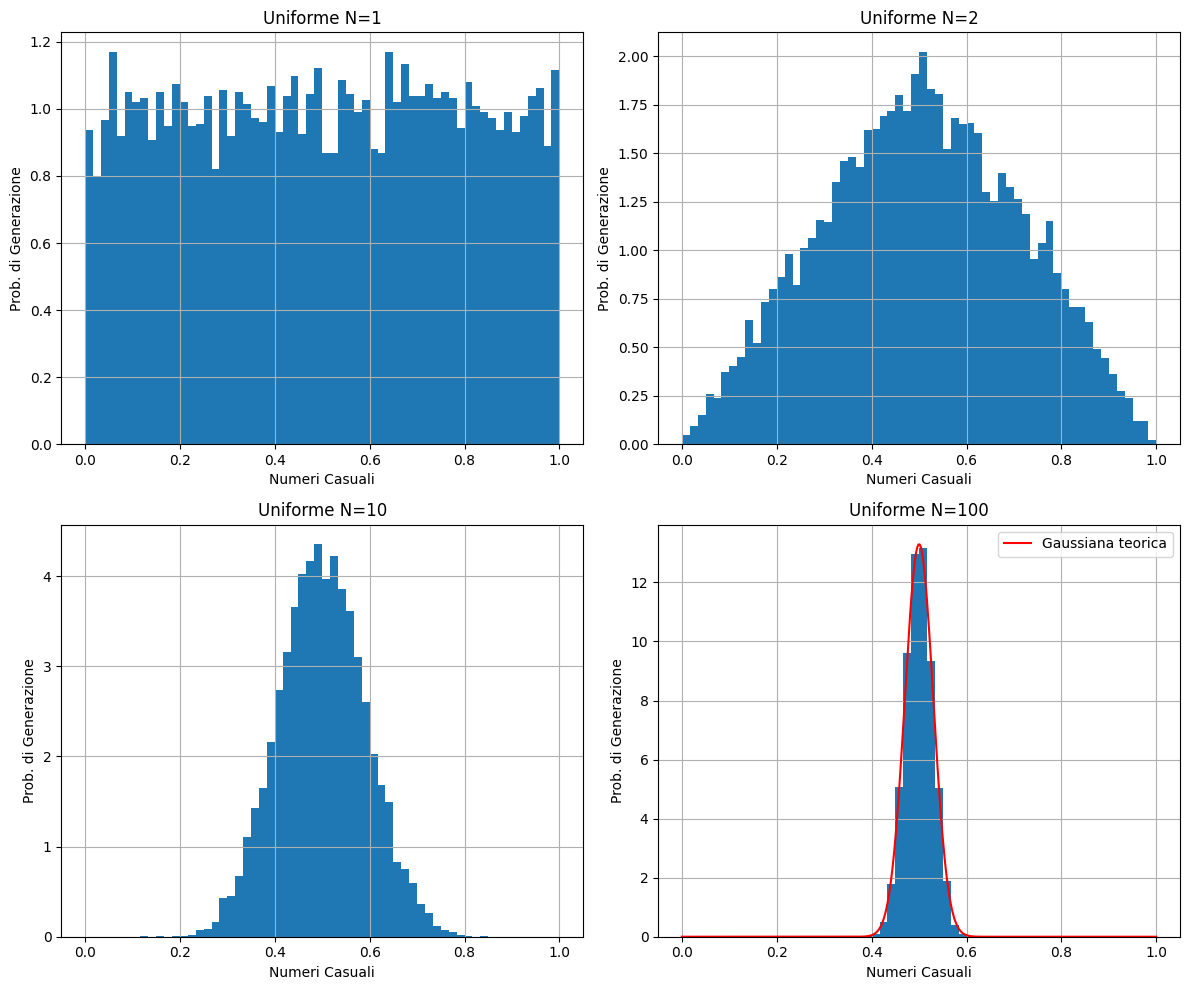

In [78]:
# --- Distribuzione Uniforme ---
unf_data = [S1unf, S2unf, S10unf, S100unf]
x_unf = np.linspace(0., 1., 400)
gauss_unf = norm.pdf(x_unf, 0.5, 0.03)
fig_unf = plot_distribuzione_2x2(unf_data, bins=60, range_=(0,1), titolo_base="Uniforme", gauss_params=(x_unf, gauss_unf))
plt.show()
plt.close(fig_unf)

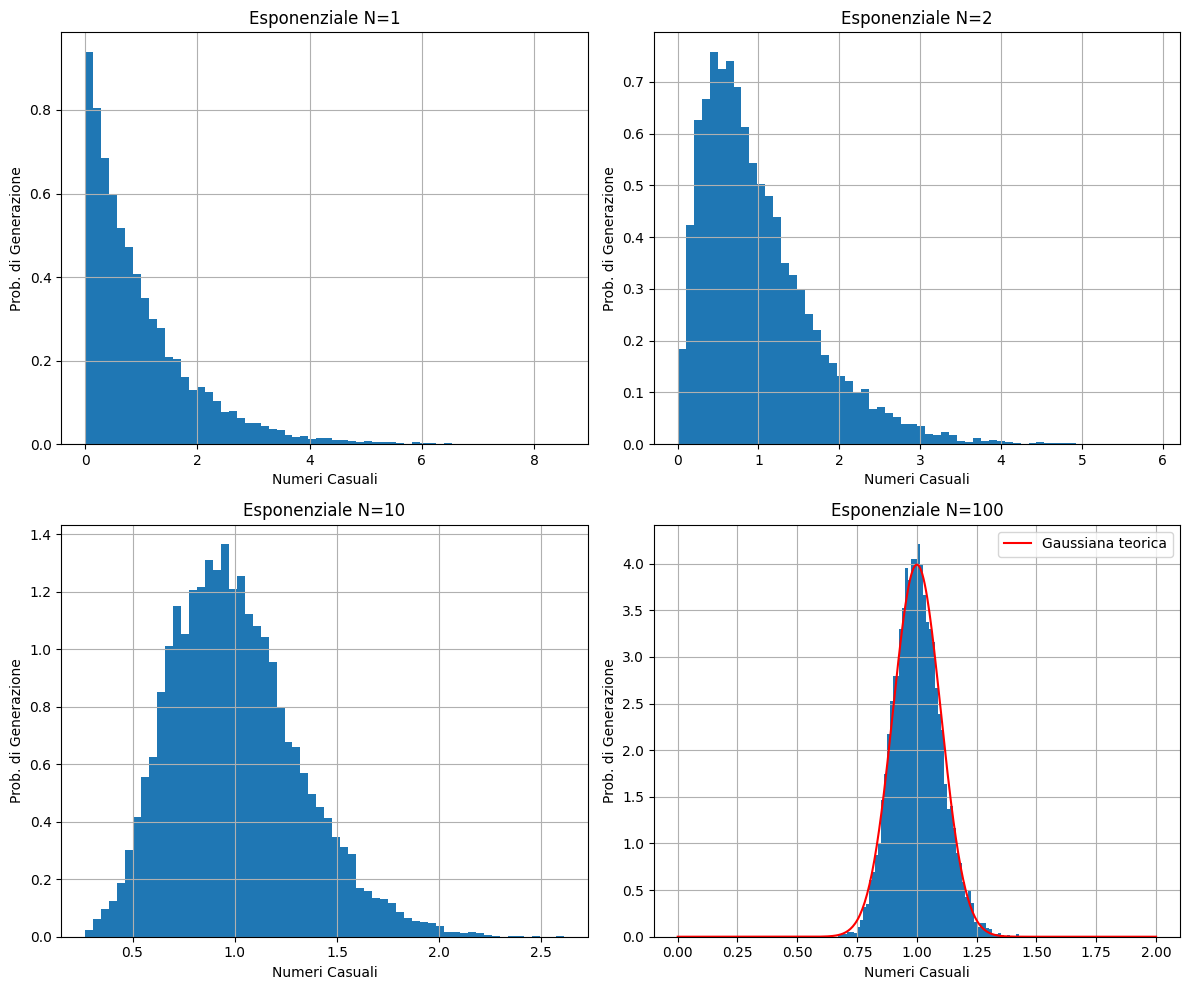

In [79]:
# --- Distribuzione Esponenziale ---
exp_data = [S1exp, S2exp, S10exp, S100exp]
x_exp = np.linspace(0., 2., 400)
gauss_exp = norm.pdf(x_exp, 1, 0.1)
fig_exp = plot_distribuzione_2x2(exp_data, bins=60, range_=None, titolo_base="Esponenziale", gauss_params=(x_exp, gauss_exp))
plt.show()
plt.close(fig_exp)

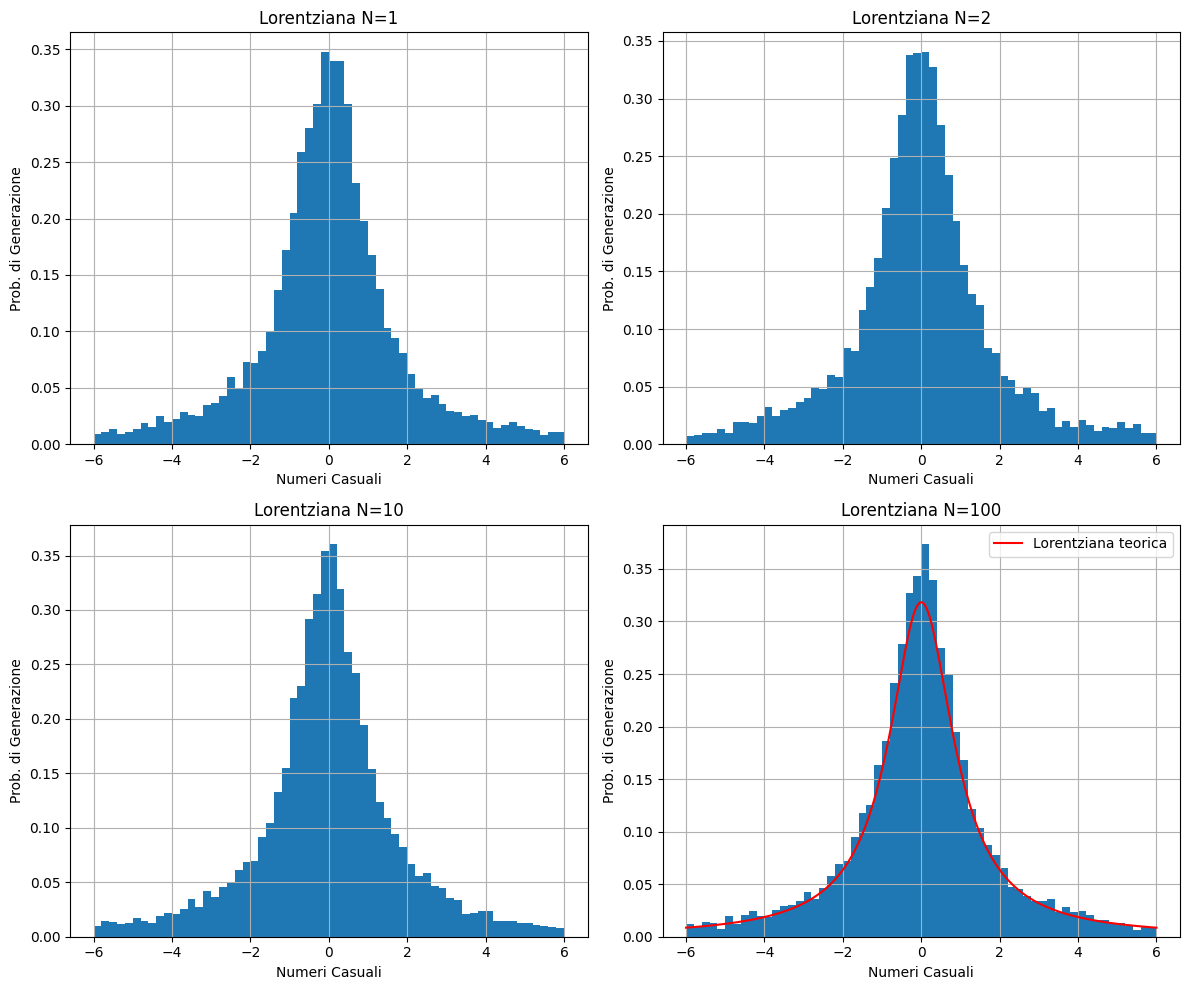

In [80]:
# --- Distribuzione Lorentziana ---
ltz_data = [S1ltz, S2ltz, S10ltz, S100ltz]
fig_ltz = plot_distribuzione_2x2(ltz_data, bins=60, range_=(-6,6), titolo_base="Lorentziana", lorentzian=True)
plt.show()
plt.close(fig_ltz)

Come previsto dal Teorema del Limite Centrale, con l’aumentare di $N$ la distribuzione della somma tende a una distribuzione gaussiana nel caso di distribuzioni con varianza finita (uniforme ed esponenziale).  
Al contrario, la distribuzione di Cauchy-Lorentz, che non ha varianza finita e quindi non rispetta le ipotesi del Teorema del Limite Centrale, non converge a una gaussiana, ma mantiene la stessa forma di Cauchy-Lorentz come distribuzione limite.

### Esercitazione 1.3

#### Metodo di stima di π tramite l’esperimento di Buffon

Simuliamo l’esperimento dell’ago di Buffon, in cui un ago di lunghezza $ L = 0.5$ viene lanciato su un piano contenente linee orizzontali equidistanti a distanza $ d = 1.0 $, con $ L < d $.  
L’obiettivo è stimare il valore di $ \pi $ osservando la frequenza con cui l’ago interseca una delle linee.

Ogni simulazione è composta da:
- $ M = 10^5$ lanci totali dell’ago;
- $ N = 100$ blocchi statistici, ciascuno con $ M/N$ lanci;

Per ogni lancio:
- Si genera un punto iniziale $ r_1 = (x_1, y_1)$, con $x_1, y_1 \in [0, d]$
- Si estrae una direzione casuale generando un punto casuale all’interno di un cerchio di raggio $ L $, centrato nell’origine
- Si calcola l’angolo $\theta$ tra l’asse x e il vettore direzione con la funzione:
  $\theta = \text{arctan}(y/x)$
- La seconda estremità dell’ago è data da:
  $x_2 = x_1 + L \cos(\theta), \quad y_2 = y_1 + L \sin(\theta)$
  

Un ago è considerato intersecante una linea orizzontale se:
$y_2 \notin [0, d] \quad \text{oppure} \quad y_1 = 0 \ \text{o} \ y_1 = d$

In tal caso, si incrementa un contatore degli "hit".

Alla fine di ogni blocco, viene stimato $ \pi $ con la formula:

$\pi \approx \frac{2 L M}{d N_{\text{hit}}}$

La media e l’incertezza statistica sono poi calcolate sui valori ottenuti nei blocchi, qui in seguito vengono riportati i risultati della simulazione del valore di $\pi$ e dell' incertezza statistica in funzione di $N$ numero di blocchi.


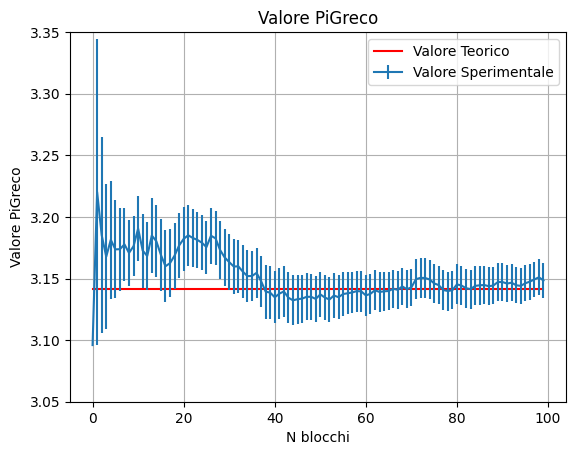

In [81]:
import matplotlib.pyplot as plt
import numpy as np


dati=np.loadtxt("Es1.3/dati3.csv",delimiter=",")
pi=dati[:,0]
err=dati[:,1]

N=100
plt.plot(range(0,N),[np.pi]*N,color="red",label="Valore Teorico")
plt.errorbar(range(0,N),pi,yerr=err,label="Valore Sperimentale")
plt.xlabel("N blocchi")
plt.ylim(3.05,3.35)
plt.title("Valore PiGreco")
plt.ylabel("Valore PiGreco")
plt.grid()
plt.legend()
plt.show()
plt.close()